# Purpose
Here, we intend to verify that all of the probability density functions are correct and match the distributions produced by the samplers.

# Importing Modules

In [2]:
from copy import copy
import numpy as np

import matplotlib.pyplot as plt
%matplotlib widget

import sys
sys.path.append('../')

import RMatrix
from Levels_rework2 import Merger
import Resonances
from SpinGroups import SpinGroups

# Level-Spacing Distributions

### Wigner Distribution

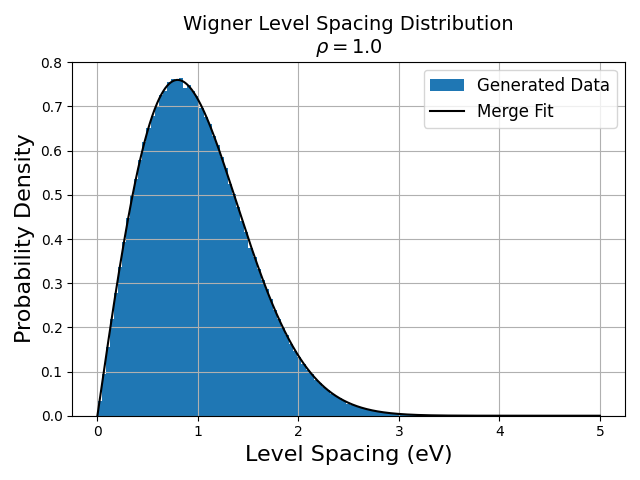

In [3]:
xMax = 5.0


A  = 181
EB = (1e-5,1e6)
Freq  = [1.0]
Gnm   = [44.11355]
Ggm   = [55.00000]
dfn   = [1, 1]
dfg   = [250]
l     = [0]
j     = [3.0]

SGs = SpinGroups.make(l, j)
MP = Resonances.MeanParameters(Freq=Freq, Gnm=Gnm, nDOF=dfn, Ggm=Ggm, gDOF=dfg, A=A, sg=SGs, EB=EB)
Res, Types, Missed_Res, Missed_Types = MP.sample('NNE')

level_spacings = np.diff(Res.E)
level_spacings = np.sort(level_spacings)
level_spacings = level_spacings[level_spacings <= xMax]



L_fit = 1000
X = np.linspace(0.0, xMax, L_fit)

level_spacing_dists = MP.distributions('Wigner')
P = level_spacing_dists(X)



plt.figure(1)
plt.clf()
plt.hist(level_spacings, 100, density=True, label='Generated Data')
plt.plot(X, P, '-k', label='Merge Fit')
plt.grid()
plt.xlabel('Level Spacing (eV)', fontsize=16)
plt.ylabel('Probability Density', fontsize=16)
plt.title('Wigner Level Spacing Distribution\n'+rf'$\rho = {Freq[0]}$', fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

### Brody Distribution

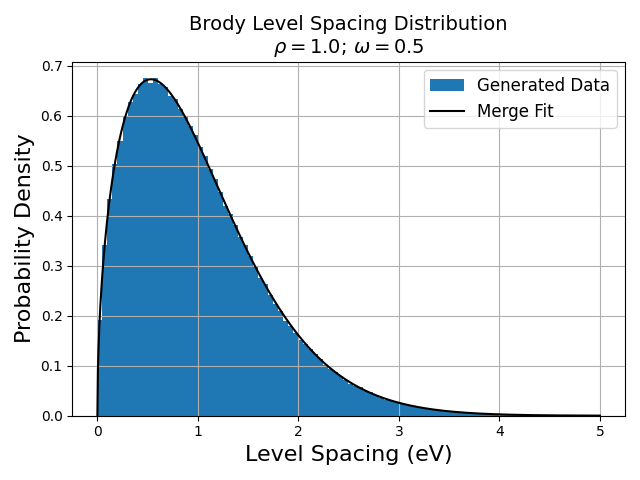

In [4]:
xMax = 5.0


A  = 181
EB = (1e-5,1e6)
Freq  = [1.0]
w     = [0.5] # Brody Parameter
Gnm   = [44.11355]
Ggm   = [55.00000]
dfn   = [1, 1]
dfg   = [250]
l     = [0]
j     = [3.0]

SGs = SpinGroups.make(l, j)
MP = Resonances.MeanParameters(Freq=Freq, Gnm=Gnm, nDOF=dfn, Ggm=Ggm, gDOF=dfg, A=A, sg=SGs, EB=EB, w=w)
Res, Types, Missed_Res, Missed_Types = MP.sample('NNE')

level_spacings = np.diff(Res.E)
level_spacings = np.sort(level_spacings)
level_spacings = level_spacings[level_spacings <= xMax]



L_fit = 1000
X = np.linspace(0.0, xMax, L_fit)

level_spacing_dists = MP.distributions('Brody')
P = level_spacing_dists(X)



plt.figure(2)
plt.clf()
plt.hist(level_spacings, 100, density=True, label='Generated Data')
plt.plot(X, P, '-k', label='Merge Fit')
plt.grid()
plt.xlabel('Level Spacing (eV)', fontsize=16)
plt.ylabel('Probability Density', fontsize=16)
plt.title('Brody Level Spacing Distribution\n'+rf'$\rho={Freq[0]}$; $\omega={w[0]}$', fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

## Merging Distribution

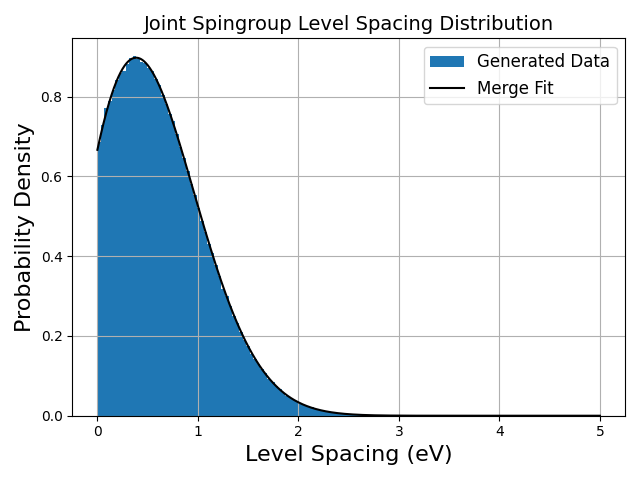

In [5]:
xMax = 5.0


A  = 181
EB = (1e-5,1e6)
Freq  = [1.0, 0.5]
Gnm   = [44.11355, 33.38697]
Ggm   = [55.00000, 55.00000]
dfn   = [1, 1]
dfg   = [250, 250]
l     = [0, 0]
j     = [3.0, 4.0]

SGs = SpinGroups.make(l, j)
MP = Resonances.MeanParameters(Freq=Freq, Gnm=Gnm, nDOF=dfn, Ggm=Ggm, gDOF=dfg, A=A, sg=SGs, EB=EB)
Res, Types, Missed_Res, Missed_Types = MP.sample('NNE')

level_spacings = np.diff(Res.E)
level_spacings = np.sort(level_spacings)
level_spacings = level_spacings[level_spacings <= xMax]



L_fit = 1000
N_fit = len(Freq)
Prior = np.ones((L_fit, N_fit))#*np.array(Freq).reshape(1,-1)/(np.sum(Freq))
X = np.linspace(0.0, xMax, L_fit)

level_spacing_dists = MP.distributions('Wigner')
merger = Merger(level_spacing_dists, err=1e-9)
P = merger.levelSpacingMerge(X, Prior, Prior)



plt.figure(3)
plt.clf()
plt.hist(level_spacings, 100, density=True, label='Generated Data')
plt.plot(X, P, '-k', label='Merge Fit')
plt.grid()
plt.xlabel('Level Spacing (eV)', fontsize=16)
plt.ylabel('Probability Density', fontsize=16)
plt.title('Joint Spingroup Level Spacing Distribution', fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

## Missing Resonances Distribution

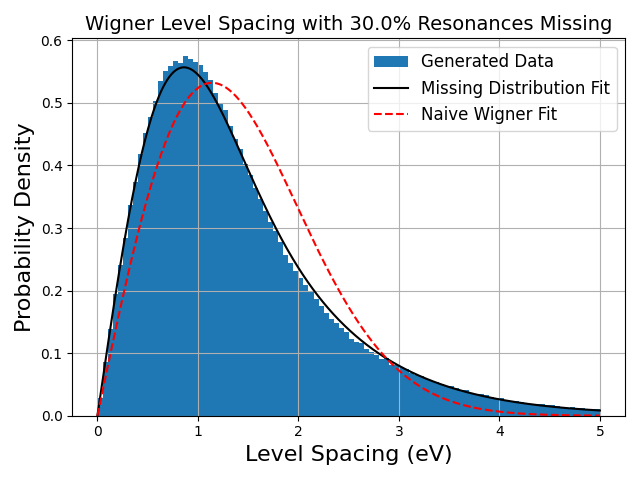

In [6]:
xMax = 5.0

A  = 181
EB = (1e-5,1e6)
pM = [0.3]
Freq  = [1.0]
Gnm   = [1.0]
Ggm   = [1.0]
dfn   = [1]
dfg   = [250]
l     = [0,]
j     = [3.0]

SGs = SpinGroups.make(l, j)
MP = Resonances.MeanParameters(Freq=Freq, Gnm=Gnm, nDOF=dfn, Ggm=Ggm, gDOF=dfg, A=A, sg=SGs, EB=EB, MissFrac=pM)
Res, Types, Missed_Res, Missed_Types = MP.sample('NNE')

level_spacings_missing = np.diff(Res.E)
level_spacings_missing = np.sort(level_spacings_missing)
level_spacings_missing = level_spacings_missing[level_spacings_missing <= xMax]



L_fit = 1000
N_fit = len(Freq)
Prior = np.ones((L_fit, N_fit))#*np.array(Freq).reshape(1,-1)/(np.sum(Freq))
X_missing = np.linspace(0.0, xMax, L_fit)

level_spacing_dists = MP.distributions('Missing', err=5e-3)
P_missing = level_spacing_dists[0].f0(X_missing)

MP2 = copy(MP)
MP2.Freq = MP.Freq*(1-MP.MissFrac)
wigner_dists = MP2.distributions('Wigner')
P_wigner = wigner_dists[0].f0(X_missing)



plt.figure(4)
plt.clf()
plt.hist(level_spacings_missing, 100, density=True, label='Generated Data')
plt.plot(X_missing, P_missing, '-k', label='Missing Distribution Fit')
plt.plot(X_missing, P_wigner, '--r', label='Naive Wigner Fit')
plt.grid()
plt.xlabel('Level Spacing (eV)', fontsize=16)
plt.ylabel('Probability Density', fontsize=16)
plt.title(f'Wigner Level Spacing with {pM[0]:.1%} Resonances Missing', fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

## Level Spacing Ratio PDF

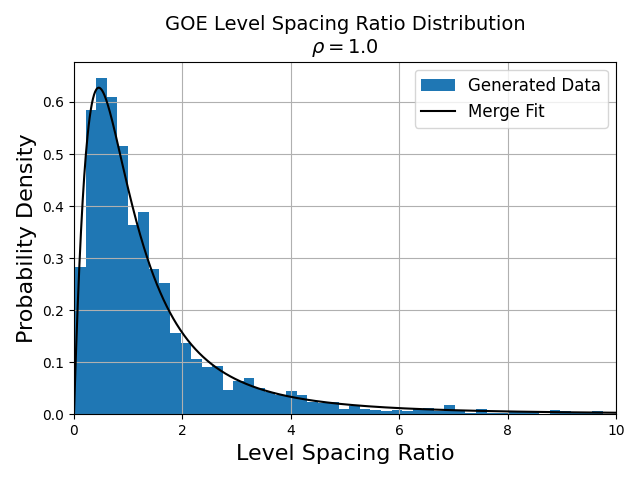

In [7]:
xMax = 10.0

A  = 181
EB = (1e-5,3e3)
Freq  = [1.0]
Gnm   = [44.11355]
Ggm   = [55.00000]
dfn   = [1, 1]
dfg   = [250]
l     = [0]
j     = [3.0]

SGs = SpinGroups.make(l, j)
MP = Resonances.MeanParameters(Freq=Freq, Gnm=Gnm, nDOF=dfn, Ggm=Ggm, gDOF=dfg, A=A, sg=SGs, EB=EB)
Res, Types, Missed_Res, Missed_Types = MP.sample('GOE')

level_spacings = np.diff(Res.E)
level_spacings = level_spacings[level_spacings <= xMax]



L_fit = 1000
X = np.linspace(0.0, xMax, L_fit)

level_spacing_ratios = level_spacings[1:]/level_spacings[:-1]
level_spacing_ratios = level_spacing_ratios[level_spacing_ratios <= xMax]

P = RMatrix.levelSpacingRatioPDF(X, beta=1)



plt.figure(5)
plt.clf()
plt.hist(level_spacing_ratios, 50, density=True, label='Generated Data')
plt.plot(X, P, '-k', label='Merge Fit')
plt.xlim(0, xMax)
plt.grid()
plt.xlabel('Level Spacing Ratio', fontsize=16)
plt.ylabel('Probability Density', fontsize=16)
plt.title('GOE Level Spacing Ratio Distribution\n'+rf'$\rho = {Freq[0]}$', fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

## Higher-Order Level-Spacing Distributions
The nth-order level-spacing is the distance between n-th removed nearest resonances. Higher-order level-spacing distribution equations come from the following journal article:

Source: https://journals.aps.org/pre/pdf/10.1103/PhysRevE.60.5371

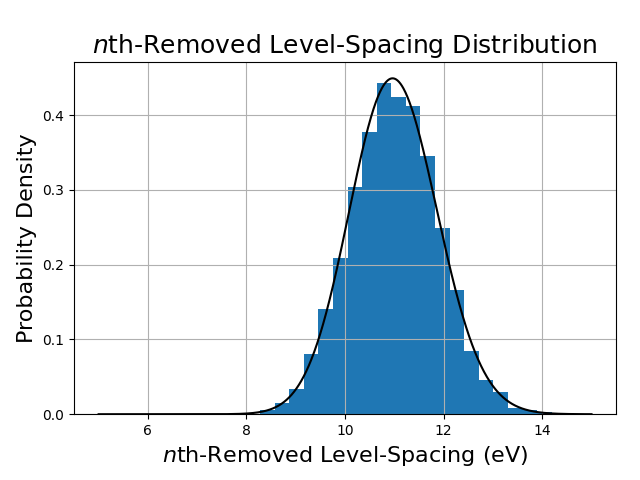

In [8]:
EB = (0, 5e3)
n = 10
X = np.linspace(n-5, n+5, 1000)

E = RMatrix.SampleEnergies(EB, Freq=1.0, ensemble='GOE')
level_spacings = E[(n+1):] - E[:-(n+1)]
P = RMatrix.high_order_level_spacing(X, n)

plt.figure(6)
plt.clf()
plt.hist(level_spacings, bins=20, density=True)
plt.plot(X, P, '-k')
plt.grid()
plt.title('$n$th-Removed Level-Spacing Distribution', fontsize=18)
plt.xlabel('$n$th-Removed Level-Spacing (eV)', fontsize=16)
plt.ylabel('Probability Density', fontsize=16)
plt.show()

# Width Distributions

## Neutron Width Distribution

In [9]:
# ...